# Detección de melanoma

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import optimizers, backend
import tensorflow.keras.utils as image_utils
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ruta de las imágenes
ruta = "/content/drive/MyDrive/Melanoma/train/"

In [4]:
# Obtención de las clases
clases = [f for f in os.listdir(ruta)]
n_clases = len(clases) #número de carpetas
print(clases)
print(n_clases)

['Benign', 'Malignant']
2


{'Benign': 6289, 'Malignant': 5594}


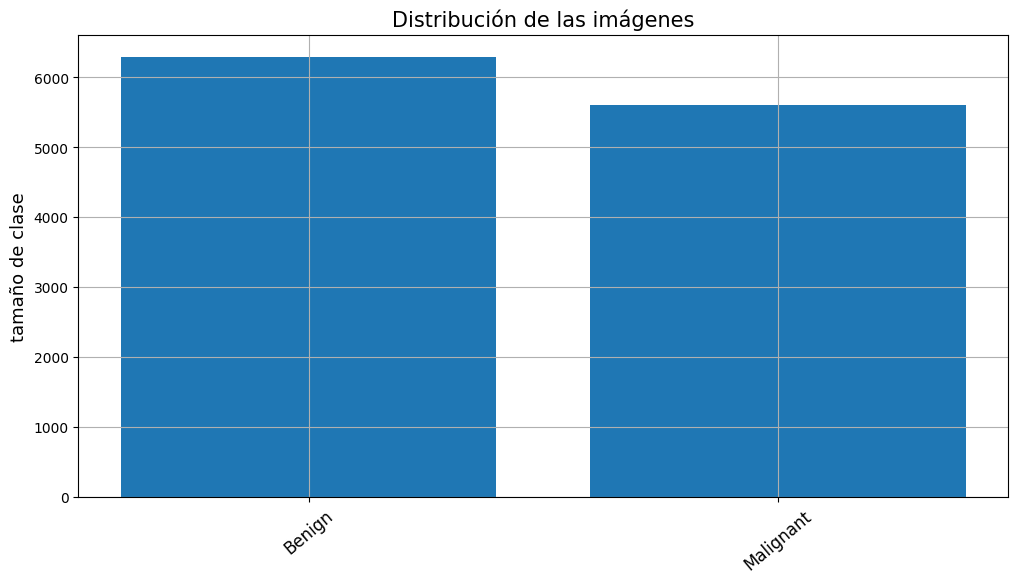

In [5]:
# Gráfica de la distribución de las clases
imgs_clase = {}
for clase in clases:
    imgs_clase[clase] = len(os.listdir(ruta+clase))

print(imgs_clase)

plt.figure(figsize=(12, 6))
plt.bar(range(len(imgs_clase)), list(imgs_clase.values()), align='center')
plt.xticks(range(len(imgs_clase)), list(imgs_clase.keys()), fontsize=12, rotation=40)
plt.ylabel('tamaño de clase', fontsize=13)
plt.title('Distribución de las imágenes', fontsize=15)
plt.grid()

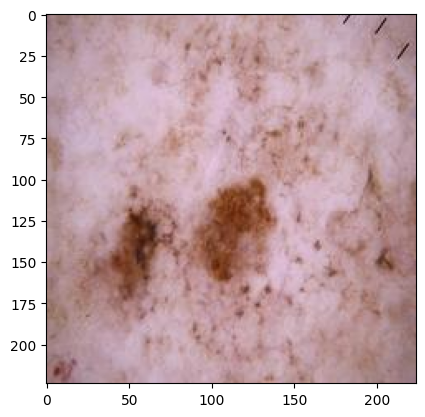

In [6]:
# Inspección visual
img = image_utils.load_img(ruta + clases[1] + '/' + '10.jpg')
plt.imshow(img)
plt.show()

## Acomodo de imágenes

In [7]:
# Variables auxiliares
ALTO = 112         # pixeles
ANCHO = 112        # pixeles
CANALES = 3      # canales
TOTAL_IMGS = 4000   # total de imágenes

In [8]:
# Lectura de las imágenes
# beningo = 0
# malignant = 1
x = np.zeros((TOTAL_IMGS, ALTO, ANCHO, CANALES))
y = np.zeros(TOTAL_IMGS)
cnt = 0
etiqueta = 0
for clase in clases:
  imgs = os.listdir(ruta + clase)
  print('Leyendo carpeta', clase)
  for n_img in range(int(TOTAL_IMGS/2)):
    imgOriginal = image_utils.load_img(ruta + clase + '/' + imgs[n_img], target_size=(ALTO, ANCHO))
    imgArreglo = image_utils.img_to_array(imgOriginal)
    x[cnt] = imgArreglo
    y[cnt] = etiqueta
    cnt += 1
  etiqueta += 1

Leyendo carpeta Benign
Leyendo carpeta Malignant


## Preprocesamiento

In [9]:
# Normalización
x = x/255

In [10]:
# Generación de datos de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3200, 112, 112, 3)
(3200,)
(800, 112, 112, 3)
(800,)


## Creación del modelo

In [12]:
# EJERCICIO
# Escribe la instrucción que elimina los modelos creados con keras
# Recuerda que es necesario eliminar el modelo cada que se desee volver a entrenar
backend.clear_session()

In [25]:
from tensorflow.keras.layers import  Dropout
from tensorflow.keras import regularizers


# EJERCICIO
# Define aqui tu modelo convolucional colocando las capas convolucionales y pooling, la capa flatten y las capas dense.
# Tip 1: comienza con modelos pequeños y luego aumentas su tamaño.
# RECUERDA QUE ÚNICAMENTE LA PRIMER CAPA DEBE LLEVAR EL PARÁMETRO: input_shape = (alto, ancho, número_de_canales)

modeloConv = Sequential()
modeloConv.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(ALTO, ANCHO, CANALES)))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Flatten())
modeloConv.add(Dropout(0.2))
modeloConv.add(Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(0.1)))
modeloConv.add(Dropout(0.2))
modeloConv.add(Dense(1, activation='sigmoid'))

# Fin de la definición del modelo

# La siguiente línea de código es para mostrar la tabla con las características del modelo
modeloConv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 110, 110, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 55, 55, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 53, 53, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 26, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dropout_2 (Dropout)         (None, 21632)            

In [26]:
# EJERCICIO
# Define el optimizador Adam
adam = optimizers.Adam(learning_rate=0.001)

In [27]:
# EJERCICIO
# Compila el modelo definiendo el optimizador "adam", la función de costo (loss) como el "crossentropy"
# y la metrica como el "accuracy"
modeloConv.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ['accuracy'])

In [28]:
# EJERCICIO
# Entrena el modelo eligiendo un número de epocas y los datos de entrenamiento y validación
# Recuerda que guardamos el entrenamiento en una variable para poder graficar el error

M = modeloConv.fit(x_train, y_train,
                   validation_data = (x_test, y_test),
                   epochs = 50, batch_size = 100,
                   shuffle = True, verbose = True)

Epoch 1/50
32/32 [==============================] - 3s 43ms/step - loss: 2.1113 - accuracy: 0.5819 - val_loss: 0.8504 - val_accuracy: 0.6988
Epoch 2/50
32/32 [==============================] - 1s 25ms/step - loss: 0.6752 - accuracy: 0.7172 - val_loss: 0.5422 - val_accuracy: 0.7912
Epoch 3/50
32/32 [==============================] - 1s 26ms/step - loss: 0.5406 - accuracy: 0.7672 - val_loss: 0.4866 - val_accuracy: 0.8050
Epoch 4/50
32/32 [==============================] - 1s 25ms/step - loss: 0.5323 - accuracy: 0.7681 - val_loss: 0.4886 - val_accuracy: 0.8100
Epoch 5/50
32/32 [==============================] - 1s 28ms/step - loss: 0.5016 - accuracy: 0.7869 - val_loss: 0.4964 - val_accuracy: 0.7975
Epoch 6/50
32/32 [==============================] - 1s 28ms/step - loss: 0.5080 - accuracy: 0.7909 - val_loss: 0.5570 - val_accuracy: 0.7337
Epoch 7/50
32/32 [==============================] - 1s 28ms/step - loss: 0.4956 - accuracy: 0.7887 - val_loss: 0.4772 - val_accuracy: 0.7950
Epoch 8/50
32

## Evaluación del modelo

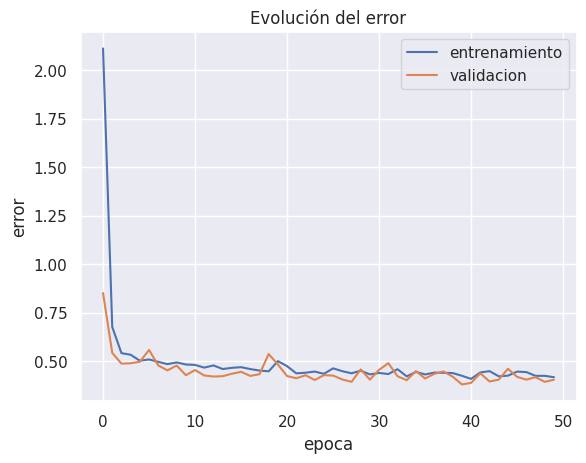

In [29]:
# Grafica de la evolución del error a traves de cada época

plt.plot(M.history['loss'], label = 'entrenamiento')
plt.plot(M.history['val_loss'], label = 'validacion')
plt.title('Evolución del error')
plt.xlabel('epoca')
plt.ylabel('error')
plt.legend(loc='best')
plt.show()

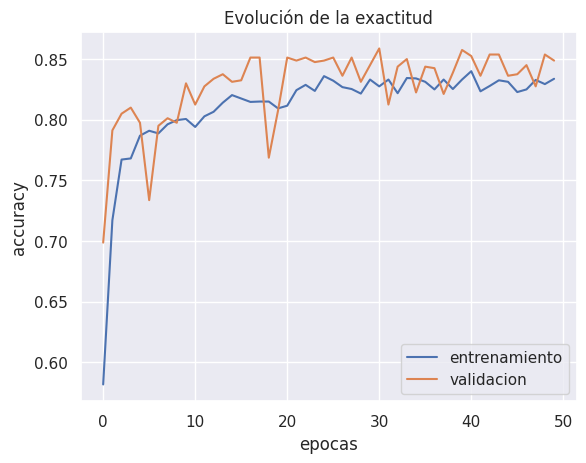

In [30]:
# Grafica de la evolución de la precisión (acc) del modelo a traves de cada época

plt.plot(M.history['accuracy'], label='entrenamiento')
plt.plot(M.history['val_accuracy'], label='validacion')
plt.title('Evolución de la exactitud')
plt.xlabel('epocas')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

In [31]:
# Evaluación del modelo
evaluacion = modeloConv.evaluate(x_test, y_test)

25/25 [==============================] - 0s 5ms/step - loss: 0.4038 - accuracy: 0.8487


1/1 [==============================] - 0s 66ms/step


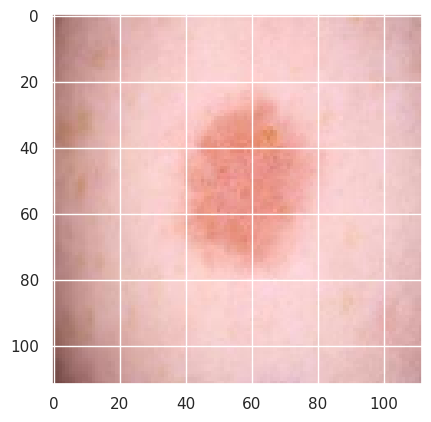

La imagen 450 pertenece a la clase 0.0, el modelo la clasifica como: [[0.06934214]]


In [32]:
# EJERCICIO
# Elije alguna de las imagenes de test para ejecutar una inferencia  con el modelo
n_imagen = 450
imagen = x_test[n_imagen].reshape(1, ALTO, ANCHO, CANALES)
clasificacion_real = y_test[n_imagen]

# En tensorflow 2.0 ya no aparece el método predict_classes, por lo que utilizaremos predict que devuelve el vector completo
clasificacion_modelo = modeloConv.predict(imagen)

plt.imshow(x_test[n_imagen], cmap='Accent')
plt.show()

print('La imagen {} pertenece a la clase {}, el modelo la clasifica como: {}'.format(n_imagen, clasificacion_real, clasificacion_modelo))

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mc = confusion_matrix(y_test, np.round(modeloConv.predict(x_test)))
print(mc)

25/25 [==============================] - 0s 4ms/step
[[316  78]
 [ 43 363]]


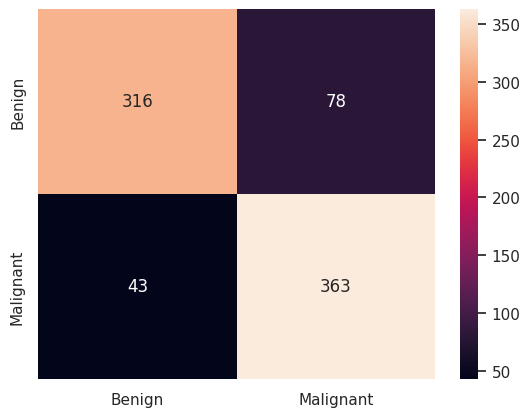

In [34]:
import seaborn as sns

# Crear el heatmap con los números formateados
sns.set()
sns.heatmap(mc, annot=True, fmt='.0f', xticklabels=clases, yticklabels=clases)
plt.show()

In [35]:
f1_score = 2*mc[1,1] / (2*mc[1,1] + mc[0,1] + mc[1,0])
print(f1_score)

0.8571428571428571


In [36]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, np.round(modeloConv.predict(x_train)))
f1_test = f1_score(y_test, np.round(modeloConv.predict(x_test)))
print('f1_train:', f1_train)
print('f1_test:', f1_test)

25/25 [==============================] - 0s 4ms/step
f1_train: 0.8502530515034236
f1_test: 0.8571428571428572
